## Description:
#### This is a sentiment analysis program that works on tweets fetched from twitter using Python

In [1]:
## Import libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
## Get the data
log = pd.read_csv('Login.csv')

In [3]:
## Get twitter API credentials
consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accessToken = log['key'][2]
accessTokenSecret = log['key'][3]

In [5]:
## Create authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

## Set access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

## Create API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [40]:
## Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name = "realDonaldTrump", count = 100, lang = "en", tweet_mode="extended")

## Print last tweets from the account
print("Show the 5 latest tweets from Bill Gates \n" )
i=1
for tweet in posts[0:5]:
    print (str(i) + ') ' + tweet.full_text + '\n') 
    i = i + 1

Show the 5 latest tweets from Bill Gates 

1) ...We need Corky in Washington – he has my Complete and Total Endorsement! #NHSEN https://t.co/PJGJ2j9Un2

2) Corky Messner (@CorkyForSenate) will be a fantastic Senator for New Hampshire! A West Point graduate, he served our Country in the Army with distinction. Strong on Jobs, Crime, Vets, Military and the Second Amendment...

3) Seattle Mayor says, about the anarchists takeover of her city, “it is a Summer of Love”. These Liberal Dems don’t have a clue. The terrorists burn and pillage our cities, and they think it is just wonderful, even the death. Must end this Seattle takeover now!

4) Interview with @HARRISFAULKNER at 1:00 P.M. on @FoxNews, Outnumbered Overtime

5) “Do you think Suburban Women want to Defund the Police? I don’t think so.” @marcthiessen



In [41]:
## Create a dataframe with a colum called tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

## Show first 5 rows of data
df.head(5)

,Tweets
0,...We need Corky in Washington – he has my Com...
1,Corky Messner (@CorkyForSenate) will be a fant...
2,"Seattle Mayor says, about the anarchists takeo..."
3,Interview with @HARRISFAULKNER at 1:00 P.M. on...
4,“Do you think Suburban Women want to Defund th...


In [42]:
## Clean the text

## Create a function to clean the tweets 
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #removes @mentions
    text = re.sub(r'#', '', text) #removes the '#' symbol
    text = re.sub(r'RT[\s]+', '', text) #removes 'RT'
    text = re.sub(r'https?:\/\/S+', '', text) #removes hyperlinks
    
    return text

## CLeaning the text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

## Show the cleaned text
df

,Tweets
0,...We need Corky in Washington – he has my Com...
1,Corky Messner () will be a fantastic Senator f...
2,"Seattle Mayor says, about the anarchists takeo..."
3,"Interview with at 1:00 P.M. on , Outnumbered ..."
4,“Do you think Suburban Women want to Defund th...
...,...
95,“Defunding Police would be good for Robbers &a...
96,"BIG DEMAND! Starting up again soon, maybe next..."
97,": Honestly, I think that our major media decid..."
98,: https://t.co/IKlMQt5efg


In [43]:
## Create a funtion to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

## Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

## Create two columns (Subjectivity and Polarity)
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

##SHow the new DF with new columns
df

,Tweets,Subjectivity,Polarity
0,...We need Corky in Washington – he has my Com...,0.575000,0.050000
1,Corky Messner () will be a fantastic Senator f...,0.437576,0.180758
2,"Seattle Mayor says, about the anarchists takeo...",0.800000,0.750000
3,"Interview with at 1:00 P.M. on , Outnumbered ...",0.000000,0.000000
4,“Do you think Suburban Women want to Defund th...,0.000000,0.000000
...,...,...,...
95,“Defunding Police would be good for Robbers &a...,0.600000,0.700000
96,"BIG DEMAND! Starting up again soon, maybe next...",0.066667,0.000000
97,": Honestly, I think that our major media decid...",0.616667,0.165625
98,: https://t.co/IKlMQt5efg,0.000000,0.000000


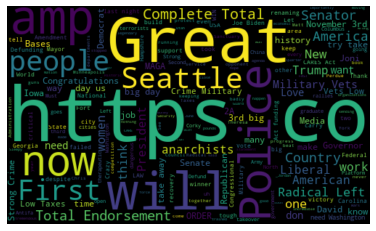

In [44]:
## Plot word cloud
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [45]:
## Create a function to compute the positive, neutral and negative analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

##Show DF
df

,Tweets,Subjectivity,Polarity,Analysis
0,...We need Corky in Washington – he has my Com...,0.575000,0.050000,Positive
1,Corky Messner () will be a fantastic Senator f...,0.437576,0.180758,Positive
2,"Seattle Mayor says, about the anarchists takeo...",0.800000,0.750000,Positive
3,"Interview with at 1:00 P.M. on , Outnumbered ...",0.000000,0.000000,Neutral
4,“Do you think Suburban Women want to Defund th...,0.000000,0.000000,Neutral
...,...,...,...,...
95,“Defunding Police would be good for Robbers &a...,0.600000,0.700000,Positive
96,"BIG DEMAND! Starting up again soon, maybe next...",0.066667,0.000000,Neutral
97,": Honestly, I think that our major media decid...",0.616667,0.165625,Positive
98,: https://t.co/IKlMQt5efg,0.000000,0.000000,Neutral


In [46]:
## Print all positive tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'])

for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == "Positive"):
        print(str(j)+') '+sortedDF['Tweets'][i])
        print()
        j = j+1

1) ...We need Corky in Washington – he has my Complete and Total Endorsement! NHSEN https://t.co/PJGJ2j9Un2

2) Corky Messner () will be a fantastic Senator for New Hampshire! A West Point graduate, he served our Country in the Army with distinction. Strong on Jobs, Crime, Vets, Military and the Second Amendment...

3) Seattle Mayor says, about the anarchists takeover of her city, “it is a Summer of Love”. These Liberal Dems don’t have a clue. The terrorists burn and pillage our cities, and they think it is just wonderful, even the death. Must end this Seattle takeover now!

4) The Republican Party has not yet voted on a Platform. No rush. I prefer a new and updated Platform, short form, if possible.

5) : This is a critical milestone. Two therapeutic antibodies are now in the clinic with more on the way. These drugs can b…

6) : It happened 'following a peaceful demonstration...'

7) : Prepare for the onslaught of "Trump's rallies are literally the most dangerous thing on planet earth

In [47]:
## Print all negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending = False)
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == "Negative"):
        print(str(j)+') '+sortedDF['Tweets'][i])
        print()
        j = j+1

1) : A third Christopher Columbus goes down.

2) : Jim Jordan Slams “Crazy” Attempt to Continue Flynn Case 🔥🔥🔥
https://t.co/DwvHkoKadq

3) Crazy! https://t.co/NIQIBhexKX

4) People have no idea how Fake the Lamestream Media is! https://t.co/qc8c8C7Pin

5) : Obama Admin Turned Down Renaming of Army Bases: ‘Reconciliation, Not Division‘ 

https://t.co/68fVWWC7uN via 

6) : “We the people will recognize, despite all the forces to the contrary, we are not each other's enemies." 🇺🇸 https://t.co/4u…

7) : There has been vigorous conversation on how to ensure fairness, equality, and justice for all—but sadly, some are only tryi…

8) ...We need Karen in Washington badly! She loves Georgia and the USA. Has my Complete and Total Endorsement! November 3rd, a big day for us all! GA06 https://t.co/5JOaLlvZE0

9) ...Unlike her Radical Liberal opponent, Theresa Greenfield, and Theresa’s failed record in real estate, Joni stands for Iowa. Vote for Joni Ernst on November 3rd, a big day for us all! IASE

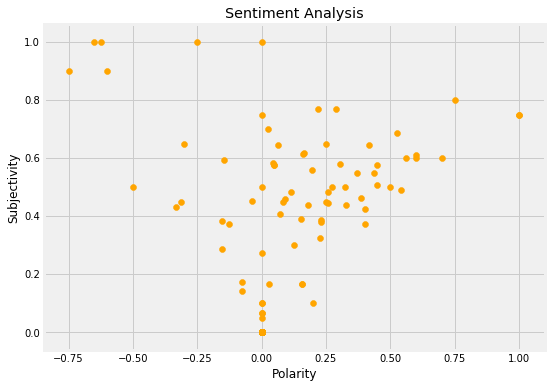

In [48]:
## Plot polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Orange')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [49]:
## Get percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0]/df.shape[0])*100, 1)

50.0

In [50]:
## Get percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round((ntweets.shape[0]/df.shape[0])*100, 1)

16.0

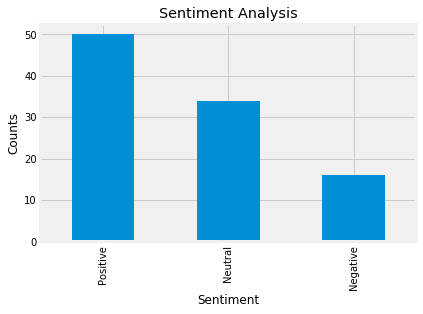

In [51]:
## Show value counts 
df['Analysis'].value_counts()

## plot and visualiza the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()